In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Data-Analytics/football_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading & Cleaning data

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_data = data.select_dtypes(include=numerics)
new_data = new_data.drop(['Unnamed: 0', 'ID','Jersey Number'], axis=1)

new_data.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
# Convert wage and value to float
def convert_Wage_Value(i):
  num=''
  for j in range(1,len(i)):
    if (i[j]<='9' and i[j]>='0') or i[j]=='.':
      num+=(i[j])
    if i[j]=='K':
      val=float(num)
      val*=1000  
      return val
    if i[j]=='M':
      val=float(num)
      val*=1e6  
      return val 
  return float(num)  

Value=pd.Series([],dtype=pd.StringDtype()) 
Wage=pd.Series([],dtype=pd.StringDtype()) 

for i in range(len(data['Value'])):
  Value[i]=convert_Wage_Value(data['Value'][i])
  Wage[i]=convert_Wage_Value(data['Wage'][i])
# inserting value and wage into dataframe after converting into numberical attributes
new_data.insert(2,'Value',Value,True)
new_data.insert(2,'Wage',Wage,True)

new_data.head()

,Age,Overall,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,565000.0,110500000.0,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,405000.0,77000000.0,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,290000.0,118500000.0,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,260000.0,72000000.0,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,355000.0,102000000.0,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
import re
# converting height in numberical and inserting into dataframe
def HeightConvert(cell):
  cell=str(cell)
  if cell[len((cell))-2]=="'":
    cell=re.sub("[']",".0",(cell))
  else:
    cell=re.sub("[']",".",(cell))
  return float(cell)
  
Height=pd.Series([],dtype=pd.StringDtype()) 
for i in range(len(new_data.index)):
  Height[i]=HeightConvert(data['Height'][i])
new_data.insert(2,'Height',Height,True)  
# new_data.describe()

new_data.head()

,Age,Overall,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,5.07,565000.0,110500000.0,94,2202,5.0,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,6.02,405000.0,77000000.0,94,2228,5.0,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,5.09,290000.0,118500000.0,93,2143,5.0,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,6.04,260000.0,72000000.0,93,1471,4.0,3.0,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,5.11,355000.0,102000000.0,92,2281,4.0,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
Weight=pd.Series([],dtype=pd.StringDtype()) 
for (coln,cold) in data.iteritems():
  if coln=="Weight":
    Weight = data[coln].apply(lambda weight : float(weight[:-3]) if type(weight) is str else float(weight))
# converting weight in numerical

# new_data.head()
new_data.insert(2,'Weight',Weight,True)
PositionsList = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for (coln, cold) in data.iteritems():
  if coln in PositionsList:
    data[coln] = data[coln].apply(lambda position : int(position[:-2]) +  (int(position[3:4])//2) if type(position) is str else float(position))
    new_data.insert(2,coln,data[coln],True)

# converting all the attributes from list PositonsList in numerical and inserting into dataframe

new_data.describe()

,Age,Overall,RB,RCB,CB,LCB,LB,RWB,RDM,CDM,LDM,LWB,RM,RCM,CM,LCM,LM,RAM,CAM,LAM,RW,RF,CF,LF,LW,RS,ST,LS,Weight,Height,Wage,Value,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.00000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,16122.000000,18159.000000,18159.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,25.122206,66.238699,57.80691,56.614750,56.614750,56.614750,57.80691,58.513398,57.825270,57.825270,57.825270,58.513398,60.734834,59.221002,59.221002,59.221002,60.734834,59.983253,59.983253,59.983253,60.037774,59.719514,59.719514,59.719514,60.037774,58.815594,58.815594,58.815594,165.979129,5.545641,9731.312133,2.410696e+06,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,4.669943,6.908930,9.51627,11.702684,11.702684,11.702684,9.51627,8.956184,10.068153,10.068153,10.068153,8.956184,9.231938,8.780952,8.780952,8.780952,9.231938,9.749195,9.749195,9.749195,9.860040,9.820331,9.820331,9.820331,9.860040,9.108812,9.108812,9.108812,15.593344,0.461820,21999.290406,5.594933e+06,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,46.000000,30.00000,26.000000,26.000000,26.000000,30.00000,31.000000,29.000000,29.000000,29.000000,31.000000,28.000000,31.000000,31.000000,31.000000,28.000000,28.000000,28.000000,28.000000,26.000000,28.000000,28.000000,28.000000,26.000000,32.000000,32.000000,32.000000,110.000000,5.010000,0.000000,0.000000e+00,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,62.000000,51.00000,47.000000,47.000000,47.000000,51.00000,52.000000,50.000000,50.000000,50.000000,52.000000,55.000000,53.000000,53.000000,53.000000,55.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,53.000000,53.000000,53.000000,154.000000,5.090000,1000.000000,3.000000e+05,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000

In [ ]:
# droping rows and columns which contain Nan values
# new_data=new_data.dropna()
# new_data.reset_index(drop = True)
# print(new_data)
# new_data.describe()

# Forward fill = Filling the empty NaN values in data
new_data.fillna(method ='ffill', inplace = True)

In the above code block, we tested by both dropping the rows containing *NaN* values and filling the *NaN* values using forward fill.     
Forward fill gave better visualization results because dropping the rows gave sparse data.

## Preprocessing data

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize 

# Scaling data so that all the features become comparable
scaler = StandardScaler()
data_scaled = scaler.fit_transform(new_data)

# Normalizing data so that it follows gaussian distribution
normalized_data = normalize(data_scaled)

# Converting numpy array to dataframe
normalized_data = pd.DataFrame(normalized_data)

normalized_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,-0.005804,-0.011987,0.003721,0.001635,0.001635,0.001635,0.003721,0.004123,0.003133,0.003133,0.003133,0.004123,0.001244,0.001746,0.001746,0.001746,0.001244,0.000250,0.000250,0.000250,0.000337,-0.001139,-0.001139,-0.001139,0.000337,-0.003611,-0.003611,-0.003611,-0.013411,-0.012448,-0.015479,-0.016930,-0.011436,0.016199,-0.015755,0.003350,0.007608,0.018450,0.011065,0.012001,0.018583,0.009399,0.019125,0.013044,0.011840,0.017938,0.018368,0.017333,0.017340,0.016278,-0.007024,0.015561,0.012454,0.002615,0.019048,-0.001127,0.012887,0.013648,0.014569,0.016148,0.009999,0.009335,0.001545,0.015168,0.016260,0.016165,-0.023376,-0.023383,-0.023261,-0.023256,-0.023320
std,0.143615,0.120881,0.128499,0.131019,0.131019,0.131019,0.128499,0.125393,0.126190,0.126190,0.126190,0.125393,0.112105,0.112214,0.112214,0.112214,0.112105,0.112924,0.112924,0.112924,0.114033,0.114729,0.114729,0.114729,0.114033,0.119107,0.119107,0.119107,0.137625,0.151512,0.078028,0.077004,0.137812,0.101949,0.090796,0.138119,0.120809,0.113894,0.120007,0.110440,0.101971,0.119177,0.101778,0.118150,0.123396,0.115205,0.096694,0.119010,0.120037,0.120831,0.122490,0.125397,0.115279,0.140363,0.118359,0.139596,0.117188,0.124548,0.129104,0.110226,0.120124,0.117766,0.120118,0.126305,0.127218,0.129246,0.089147,0.089297,0.089594,0.089219,0.089004
min,-0.501380,-0.415067,-0.276638,-0.270935,-0.270935,-0.270935,-0.276638,-0.277689,-0.260441,-0.260441,-0.260441,-0.277689,-0.243141,-0.229636,-0.229636,-0.229636,-0.243141,-0.231477,-0.231477,-0.231477,-0.237006,-0.235499,-0.235499,-0.235499,-0.237006,-0.266856,-0.266856,-0.266856,-0.636575,-0.330562,-0.137677,-0.132105,-0.588677,-0.224704,-0.099534,-0.571393,-0.223621,-0.459531,-0.289366,-0.413721,-0.325253,-0.360367,-0.272093,-0.321201,-0.304965,-0.454957,-0.335025,-0.442863,-0.459563,-0.444783,-0.528721,-0.523603,-0.390907,-0.607719,-0.444778,-0.626394,-0.341318,-0.437792,-0.334294,-0.320963,-0.426032,-0.414024,-0.455551,-0.370008,-0.285482,-0.304970,-0.222184,-0.211089,-0.204782,-0.238499,-0.201534
25%,-0.108854,-0.095490,-0.094584,-0.111920,-0.111920,-0.111920,-0.094584,-0.089416,-0.094145,-0.094145,-0.094145,-0.089416,-0.087941,-0.094803,-0.094803,-0.094803,-0.087941,-0.088884,-0.088884,-0.088884,-0.088322,-0.093675,-0.093675,-0.093675,-0.088322,-0.105024,-0.105024,-0.105024,-0.102481,-0.149401,-0.056749,-0.057526,-0.099461,-0.070137,-0.050678,0.006142,-0.087902,-0.088796,-0.109885,-0.069664,-0.049607,-0.101085,-0.050566,-0.096129,-0.094202,-0.082356,-0.039672,-0.067875,-0.065378,-0.073288,-0.095631,-0.072166,-0.080856,-0.082271,-0.061756,-0.080235,-0.105897,-0.092315,-0.109837,-0.088294,-0.086248,-0.090309,-0.089347,-0.107994,-0.112864,-0.111666,-0.069222,-0.069207,-0.069286,-0.068535,-0.068263
50%,-0.004790,-0.005143,0.010508,0.021503,0.021503,0.021503,0.010508,0.008616,0.009195,0.009195,0.009195,0.008616,0.012633,0.000742,

## Dimension Reduction
Dimension Reduction to 2D using PCA for better visualization

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(normalized_data)
reduced_data = pd.DataFrame(reduced_data)
reduced_data.columns = ['P1', 'P2']

reduced_data.describe()

,P1,P2
count,1.820700e+04,1.820700e+04
mean,4.358694e-17,2.427222e-17
std,5.806985e-01,4.946387e-01
min,-9.225924e-01,-8.918885e-01
25%,-5.599268e-01,-4.292171e-01
50%,-7.733905e-03,-6.115128e-02
75%,5.401389e-01,4.401620e-01
max,1.004308e+00,9.546268e-01


## Visualizing working of Dendogram

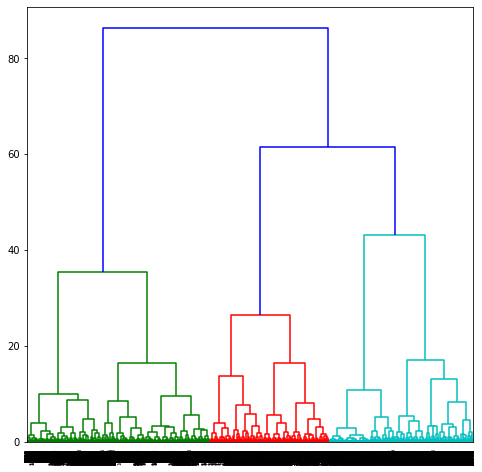

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

plt.figure(figsize =(8, 8))
Dendrogram = shc.dendrogram((shc.linkage(reduced_data, method ='ward')))

Hierarchical clustering is usually used to better understand the structure and relationships in your data and based on them you decide what number of clusters seems appropriate for your purpose.

**How to choose optimal number of clusters based on dendogram?**

*Look for the clusters with the longest ‘branches’, the shorter they are, the more similar they are to following ‘twigs’ and ‘leaves’.    
Although finally we need to check the best no of clusters practically.*

## Visualizing for different no of clusters

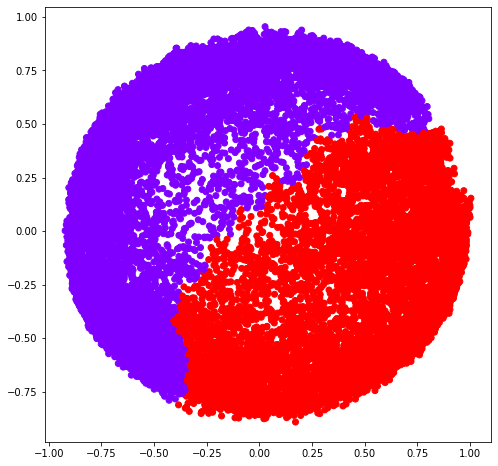

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# k=2
ac2 = AgglomerativeClustering(n_clusters = 2)

# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(reduced_data['P1'], reduced_data['P2'], c = ac2.fit_predict(reduced_data), cmap ='rainbow')
plt.show()

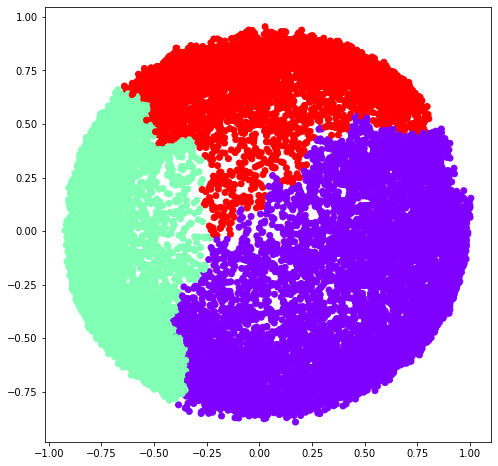

In [ ]:
# k=3
ac3 = AgglomerativeClustering(n_clusters = 3)

# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(reduced_data['P1'], reduced_data['P2'], c = ac3.fit_predict(reduced_data), cmap ='rainbow')
plt.show()

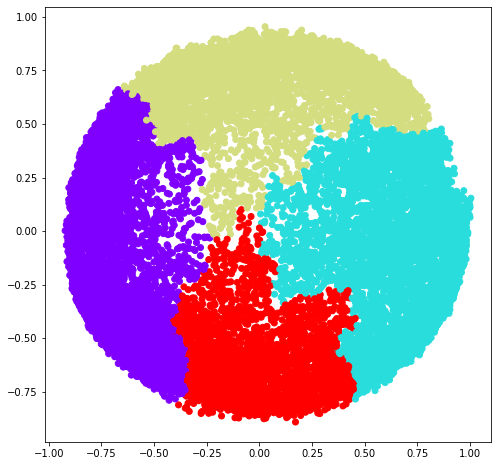

In [ ]:
# k=4
ac4 = AgglomerativeClustering(n_clusters = 4)

# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(reduced_data['P1'], reduced_data['P2'], c = ac4.fit_predict(reduced_data), cmap ='rainbow')
plt.show()

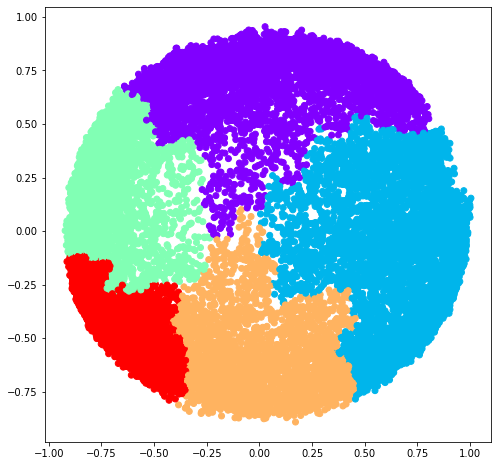

In [ ]:
# k=5
ac5 = AgglomerativeClustering(n_clusters = 5)

# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(reduced_data['P1'], reduced_data['P2'], c = ac5.fit_predict(reduced_data), cmap ='rainbow')
plt.show()

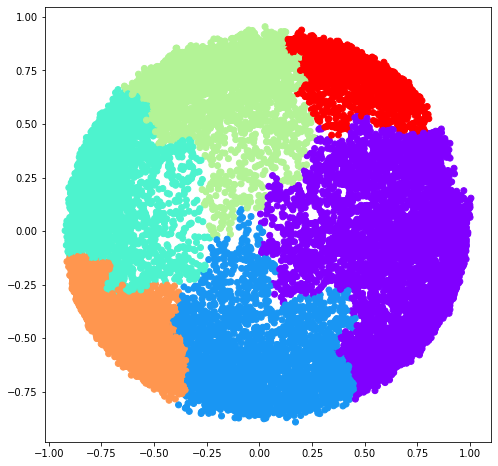

In [ ]:
# k=6
ac6 = AgglomerativeClustering(n_clusters = 6)

# Visualizing the clustering
plt.figure(figsize =(8, 8))
plt.scatter(reduced_data['P1'], reduced_data['P2'], c = ac6.fit_predict(reduced_data), cmap ='rainbow')
plt.show()

## Comparison using Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Appending the silhouette scores of the different models to the list 
silhouette_scores = []
silhouette_scores.append(silhouette_score(normalized_data, ac2.fit_predict(normalized_data)))
silhouette_scores.append(silhouette_score(normalized_data, ac3.fit_predict(normalized_data)))
silhouette_scores.append(silhouette_score(normalized_data, ac4.fit_predict(normalized_data)))
silhouette_scores.append(silhouette_score(normalized_data, ac5.fit_predict(normalized_data)))
silhouette_scores.append(silhouette_score(normalized_data, ac6.fit_predict(normalized_data)))

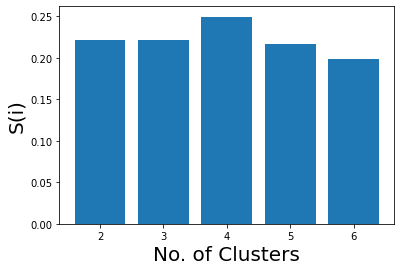

[0.22111164675866438, 0.22096734698286216, 0.24945516810697613, 0.21685147685568962, 0.1980648052767617]


In [ ]:
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6] 

plt.bar(k, silhouette_scores) 
plt.xlabel('No. of Clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 
print(silhouette_scores)